In [56]:
import requests
url = "http://182.18.164.20/transformer_api/Total_Power/"
user = "admin"
passwd = "admin@123"
auth_values = (user, passwd)
response = requests.get(url, auth=auth_values)

In [57]:
import pandas as pd
tp = pd.DataFrame.from_dict(response.json(), orient='columns')
tp

,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD
0,988141,867322031102411,2021-06-23T16:31:41,450728.000,455554.200,0.0,93.634,95.076,16.497,151.4,153.0
1,988126,867322031025331,2021-06-23T16:30:18,106202.000,127129.100,0.0,80.626,95.707,1.245,105.0,126.7
2,988101,867322031102411,2021-06-23T16:16:44,450703.700,455529.500,0.0,101.620,102.963,16.577,151.4,153.0
3,988088,867322031025331,2021-06-23T16:15:23,106182.200,127105.600,0.0,81.700,96.454,1.094,105.0,126.7
4,988148,868997035786522,2021-06-23T16:15:18,307134.200,318023.800,0.0,110.502,115.277,32.836,147.2,154.1
...,...,...,...,...,...,...,...,...,...,...,...
984828,55315,868996035122100,2000-01-01T00:08:24,956.813,1067.283,0.0,8.405,8.954,3.085,0.0,0.0
984829,7606,868325022974721,2000-01-01T00:07:31,40.750,40.871,0.0,0.000,0.000,0.000,0.0,0.0
984830,6174,864502030106769,2000-01-01T00:06:57,493.693,498.005,0.0,45.071,48.933,19.053,0.0,0.0
984831,410333,868997035786639,2000-01-01T00:05:15,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0


In [58]:
tp.isnull().sum()

A_id               0
DeviceImei         0
DeviceTimeStamp    0
KWH                0
KVARH              0
Sum_I              0
KW                 0
KVA                0
KVAR               0
MPD                0
MKVAD              0
dtype: int64

In [59]:
tp['DeviceTimeStamp_'] = pd.to_datetime(tp['DeviceTimeStamp'])
tp.head()

,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD,DeviceTimeStamp_
0,988141,867322031102411,2021-06-23T16:31:41,450728.0,455554.2,0.0,93.634,95.076,16.497,151.4,153.0,2021-06-23 16:31:41
1,988126,867322031025331,2021-06-23T16:30:18,106202.0,127129.1,0.0,80.626,95.707,1.245,105.0,126.7,2021-06-23 16:30:18
2,988101,867322031102411,2021-06-23T16:16:44,450703.7,455529.5,0.0,101.620,102.963,16.577,151.4,153.0,2021-06-23 16:16:44
3,988088,867322031025331,2021-06-23T16:15:23,106182.2,127105.6,0.0,81.700,96.454,1.094,105.0,126.7,2021-06-23 16:15:23
4,988148,868997035786522,2021-06-23T16:15:18,307134.2,318023.8,0.0,110.502,115.277,32.836,147.2,154.1,2021-06-23 16:15:18


In [60]:
import datetime
x=tp['DeviceTimeStamp_'].max()
y=tp['DeviceTimeStamp_'].min()
days = datetime.timedelta(90)
month_3=x-days

In [61]:
tp = tp.iloc[::-1]
tp

,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD,DeviceTimeStamp_
984832,344343,867322031023443,2000-01-01T00:02:17,4893.938,4979.374,0.0,3.240,3.253,-0.280,0.0,0.0,2000-01-01 00:02:17
984831,410333,868997035786639,2000-01-01T00:05:15,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,2000-01-01 00:05:15
984830,6174,864502030106769,2000-01-01T00:06:57,493.693,498.005,0.0,45.071,48.933,19.053,0.0,0.0,2000-01-01 00:06:57
984829,7606,868325022974721,2000-01-01T00:07:31,40.750,40.871,0.0,0.000,0.000,0.000,0.0,0.0,2000-01-01 00:07:31
984828,55315,868996035122100,2000-01-01T00:08:24,956.813,1067.283,0.0,8.405,8.954,3.085,0.0,0.0,2000-01-01 00:08:24
...,...,...,...,...,...,...,...,...,...,...,...,...
4,988148,868997035786522,2021-06-23T16:15:18,307134.200,318023.800,0.0,110.502,115.277,32.836,147.2,154.1,2021-06-23 16:15:18
3,988088,867322031025331,2021-06-23T16:15:23,106182.200,127105.600,0.0,81.700,96.454,1.094,105.0,126.7,2021-06-23 16:15:23
2,988101,867322031102411,2021-06-23T16:16:44,450703.700,455529.500,0.0,101.620,102.963,16.577,151.4,153.0,2021-06-23 16:16:44
1,988126,867322031025331,2021-06-23T16:30:18,106202.000,127129.100,0.0,80.626,95.707,1.245,105.0,126.7,2021-06-23 16:30:18


In [62]:
tp=tp.reset_index()
tp

,index,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD,DeviceTimeStamp_
0,984832,344343,867322031023443,2000-01-01T00:02:17,4893.938,4979.374,0.0,3.240,3.253,-0.280,0.0,0.0,2000-01-01 00:02:17
1,984831,410333,868997035786639,2000-01-01T00:05:15,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,2000-01-01 00:05:15
2,984830,6174,864502030106769,2000-01-01T00:06:57,493.693,498.005,0.0,45.071,48.933,19.053,0.0,0.0,2000-01-01 00:06:57
3,984829,7606,868325022974721,2000-01-01T00:07:31,40.750,40.871,0.0,0.000,0.000,0.000,0.0,0.0,2000-01-01 00:07:31
4,984828,55315,868996035122100,2000-01-01T00:08:24,956.813,1067.283,0.0,8.405,8.954,3.085,0.0,0.0,2000-01-01 00:08:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984828,4,988148,868997035786522,2021-06-23T16:15:18,307134.200,318023.800,0.0,110.502,115.277,32.836,147.2,154.1,2021-06-23 16:15:18
984829,3,988088,867322031025331,2021-06-23T16:15:23,106182.200,127105.600,0.0,81.700,96.454,1.094,105.0,126.7,2021-06-23 16:15:23
984830,2,988101,867322031102411,2021-06-23T16:16:44,450703.700,455529.500,0.0,101.620,102.963,16.577,151.4,153.0,2021-06-23 16:16:44
984831,1,988126,867322031025331,2021-06-23T16:30:18,106202.000,127129.100,0.0,80.626,95.707,1.245,105.0,126.7,2021-06-23 16:30:18


In [63]:
tot_trans=len(tp['DeviceImei'].value_counts())

In [64]:
tot_trans

75

In [65]:
df=tp.copy()

In [66]:
days=[]
for i in df['DeviceTimeStamp']:
    ts = i[0:10]
    days.append(ts)

In [67]:
df['days'] = days
df

,index,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD,DeviceTimeStamp_,days
0,984832,344343,867322031023443,2000-01-01T00:02:17,4893.938,4979.374,0.0,3.240,3.253,-0.280,0.0,0.0,2000-01-01 00:02:17,2000-01-01
1,984831,410333,868997035786639,2000-01-01T00:05:15,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,2000-01-01 00:05:15,2000-01-01
2,984830,6174,864502030106769,2000-01-01T00:06:57,493.693,498.005,0.0,45.071,48.933,19.053,0.0,0.0,2000-01-01 00:06:57,2000-01-01
3,984829,7606,868325022974721,2000-01-01T00:07:31,40.750,40.871,0.0,0.000,0.000,0.000,0.0,0.0,2000-01-01 00:07:31,2000-01-01
4,984828,55315,868996035122100,2000-01-01T00:08:24,956.813,1067.283,0.0,8.405,8.954,3.085,0.0,0.0,2000-01-01 00:08:24,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984828,4,988148,868997035786522,2021-06-23T16:15:18,307134.200,318023.800,0.0,110.502,115.277,32.836,147.2,154.1,2021-06-23 16:15:18,2021-06-23
984829,3,988088,867322031025331,2021-06-23T16:15:23,106182.200,127105.600,0.0,81.700,96.454,1.094,105.0,126.7,2021-06-23 16:15:23,2021-06-23
984830,2,988101,867322031102411,2021-06-23T16:16:44,450703.700,455529.500,0.0,101.620,102.963,16.577,151.4,153.0,2021-06-23 16:16:44,2021-06-23
984831,1,988126,867322031025331,2021-06-23T16:30:18,106202.000,127129.100,0.0,80.626,95.707,1.245,105.0,126.7,2021-06-23 16:30:18,2021-06-23


In [68]:
df = df[['days', 'MPD']]
df

,days,MPD
0,2000-01-01,0.0
1,2000-01-01,0.0
2,2000-01-01,0.0
3,2000-01-01,0.0
4,2000-01-01,0.0
...,...,...
984828,2021-06-23,147.2
984829,2021-06-23,105.0
984830,2021-06-23,151.4
984831,2021-06-23,105.0


In [69]:
df=df.groupby(['days']).sum()
df

,MPD
days,
2000-01-01,84.9
2000-01-02,39.2
2000-01-03,7.8
2000-01-05,0.0
2000-02-28,0.0
...,...
2021-06-19,473861.5
2021-06-20,471044.1
2021-06-21,470187.9


In [70]:
df=df.reset_index()
df

,days,MPD
0,2000-01-01,84.9
1,2000-01-02,39.2
2,2000-01-03,7.8
3,2000-01-05,0.0
4,2000-02-28,0.0
...,...,...
238,2021-06-19,473861.5
239,2021-06-20,471044.1
240,2021-06-21,470187.9
241,2021-06-22,463626.3


In [71]:
df['days_'] = pd.to_datetime(df['days'])
df

,days,MPD,days_
0,2000-01-01,84.9,2000-01-01
1,2000-01-02,39.2,2000-01-02
2,2000-01-03,7.8,2000-01-03
3,2000-01-05,0.0,2000-01-05
4,2000-02-28,0.0,2000-02-28
...,...,...,...
238,2021-06-19,473861.5,2021-06-19
239,2021-06-20,471044.1,2021-06-20
240,2021-06-21,470187.9,2021-06-21
241,2021-06-22,463626.3,2021-06-22


In [72]:
df[df['days_']=='2020-11-05']

,days,MPD,days_
16,2020-11-05,3281.4,2020-11-05


In [79]:
df1=df[16:242].reset_index()

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
plot_data = [
    go.Scatter(
        x=df1['days_'],
        y=df1['MPD'],
        name='MPD'
    )
    
]
plot_layout = go.Layout(
        title='Total Power',
        xaxis_title='Time',
        yaxis_title='MPD'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="linear"))
pyoff.iplot(fig)

In [99]:
df1['MPD'].max() - df1['MPD'].min()

665275.6000000047

In [25]:
df_weekly = df1[['days_','MPD']].resample('7D', on='days_').mean().reset_index(drop=False)

In [26]:
plot_data = [
    go.Scatter(
        x=df_weekly['days_'],
        y=df_weekly['MPD'],
        name='Historical MPD'
    )
]
plot_layout = go.Layout(
        title='Current, Device Id: 867322031102411, ',
        xaxis_title='Time',
        yaxis_title='MPD',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="linear"))
pyoff.iplot(fig)

In [29]:
df_monthly = df1[['days_','MPD']].resample('M', on='days_').mean().reset_index(drop=False)

In [30]:
plot_data = [
    go.Scatter(
        x=df_monthly['days_'],
        y=df_monthly['MPD'],
        name='Historical MPD'
    )
]
plot_layout = go.Layout(
        title='Current, Device Id: 867322031102411, ',
        xaxis_title='Time',
        yaxis_title='MPD',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="linear"))
pyoff.iplot(fig)

In [81]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df1['MPD'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.271831
p-value                          0.016186
#Lags Used                       3.000000
Number of Observations Used    222.000000
Critical Value (1%)             -3.460154
Critical Value (5%)             -2.874649
Critical Value (10%)            -2.573757
dtype: float64


In [32]:
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [82]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh',title=''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

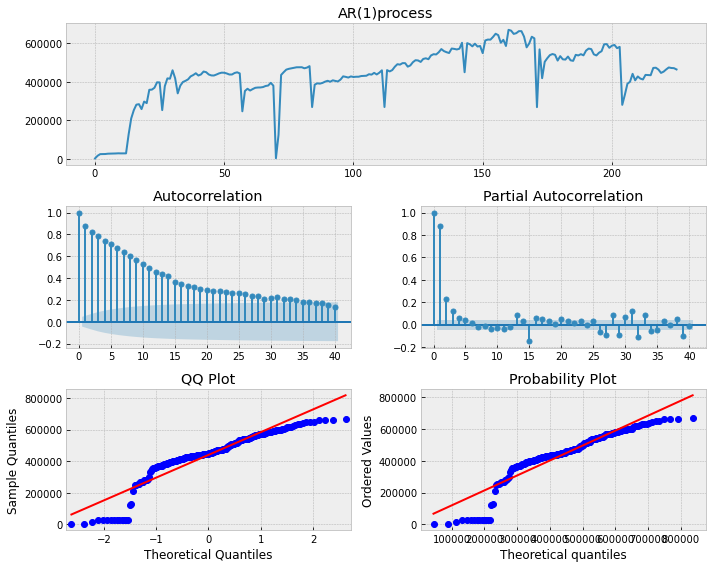

In [83]:
limit=40    
_ = tsplot(df1['MPD'],lags=limit,title="AR(1)process")

In [38]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  

stepwise_fit = auto_arima(df1['MPD'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 10, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[10]             : AIC=5271.284, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[10]             : AIC=5383.357, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[10]             : AIC=5312.339, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[10]             : AIC=5271.380, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[10]             : AIC=5347.881, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[10]             : AIC=5273.209, Time=0.26 sec
 ARIMA(1,1,1)(0,1,2)[10]             : AIC=5273.211, Time=0.57 sec
 ARIMA(1,1,1)(1,1,0)[10]             : AIC=5303.448, Time=0.16 sec
 ARIMA(1,1,1)(1,1,2)[10]             : AIC=5275.284, Time=0.56 sec
 ARIMA(1,1,0)(0,1,1)[10]             : AIC=5279.776, Time=0.07 sec
 ARIMA(2,1,1)(0,1,1)[10]             : AIC=5273.171, Time=0.23 sec
 ARIMA(1,1,2)(0,1,1)[10]             : AIC=5271.593, Time=0.19 sec
 ARIMA(0,1,0)(0,1,1)[10]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,2)(0,1,1)[10]             : AIC=5269.960, Time=0.10 sec
 ARIMA(0,1,2)(0,1,0)[10]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  220
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 10)   Log Likelihood               -2630.980
Date:                              Sat, 19 Jun 2021   AIC                           5269.960
Time:                                      22:10:43   BIC                           5283.329
Sample:                                           0   HQIC                          5275.365
                                              - 220                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4247      0.101     -4.219      0.000      -0.622      -0.227
ma.L2         -0.1227      0.084     -1.461      0.144      -0.287       0.042
ma.S.L10      -0.8782      0.153     -5.732      0.000      -1.178      -0.578
sigma2      7.763e+09   3.11e-11    2.5e+20      0.000    7.76e+09    7.76e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1982.72
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -2.62
Prob(H) (two-sided):                  0.59   Kurtosis:                        17.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.06e+36. Standard errors may be unstable.
"""

In [92]:
# Split data into train / test sets 
train = df1.iloc[:len(df1)-7] 
test = df1.iloc[len(df1)-7:] 
# Fit a SARIMAX(3, 0, 0)x(2, 1, 0, 100) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['MPD'], order = (0, 1, 2), seasonal_order =(0, 1, 1, 30)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  MPD   No. Observations:                  219
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 30)   Log Likelihood               -2373.139
Date:                              Wed, 23 Jun 2021   AIC                           4754.277
Time:                                      16:02:05   BIC                           4767.223
Sample:                                           0   HQIC                          4759.522
                                              - 219                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5063      0.096     -5.288      0.000      -0.694      -0.319
ma.L2         -0.1405      0.092     -1.526      0.127      -0.321       0.040
ma.S.L30      -0.7471      0.116     -6.433      0.000      -0.975      -0.519
sigma2      7.979e+09   1.54e-11   5.17e+20      0.000    7.98e+09    7.98e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1155.24
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -2.28
Prob(H) (two-sided):                  0.76   Kurtosis:                        14.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+35. Standard errors may be unstable.
"""

In [44]:
start = len(train) 
end = len(train) + len(test) - 1

<AxesSubplot:>

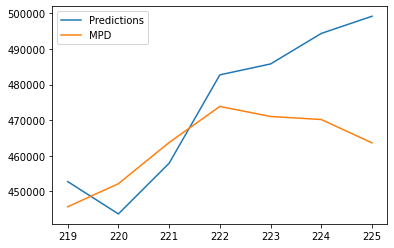

In [93]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 

# plot predictions and actual values 
predictions.plot(legend = True)
test['MPD'].plot(legend = True)

In [94]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['MPD'], predictions)
print('Test MSE: %.3f' % error)
rmse_inut = np.sqrt(mean_squared_error(test['MPD'], predictions))
print('Test RMSE: %.3f' % rmse_inut)

Test MSE: 329005482.360
Test RMSE: 18138.508


In [95]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [96]:
mape = MAPE(test['MPD'], predictions)
print('Test MAPE: %.3f' % mape)

Test MAPE: 3.221


In [97]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['MPD'], predictions)

14969.315863628248

Coefficients: [ 3.73393114e-01 -2.51085525e+01  5.63684141e+02 -4.80125781e+03
  1.59362814e+04  3.94463102e+05]


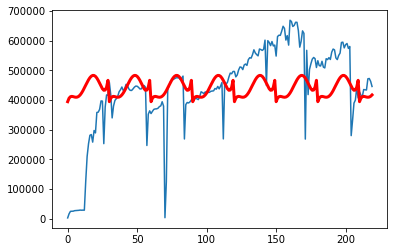

In [49]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%30 for i in range(0, len(df1['MPD']))]
y = df1['MPD'].values
degree = 5
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(df1['MPD'].values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

In [50]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(df1['MPD'], curve)
print('Test MSE: %.3f' % error)
rmse_inut = np.sqrt(mean_squared_error(df1['MPD'], curve))
print('Test RMSE: %.3f' % rmse_inut)

Test MSE: 20559639963.468
Test RMSE: 143386.331
